# Feature Selection with scikit learn

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold

In [2]:
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_classes=2,
    random_state=10,
)


In [3]:
# Print the generated feature
X[:5]

array([[-0.51050921, -0.68108852,  0.17043501,  0.76071258, -0.64784844,
         1.01558045, -0.51607418, -0.41618594,  0.57692085, -0.34356571],
       [-0.12118677, -1.02763096, -1.05776041,  0.60910882, -1.05570198,
        -1.12774375, -0.44684088,  0.95642414, -0.26186328,  0.12731924],
       [-0.41978295,  1.80600966,  0.37795528, -0.26889511,  0.18417101,
         0.81066122, -2.24975487, -1.58968079, -0.50311906,  0.37243875],
       [ 0.73868701,  0.40445144,  0.90442442, -1.47547086, -1.87921136,
         0.78953521, -2.61355648, -1.1089696 , -0.15337354,  0.13682185],
       [ 1.27344318,  0.2189245 ,  0.90200215, -1.06394399,  0.20333939,
         1.02898186,  0.86809946,  1.34097255,  1.93529683, -1.25457998]])

In [4]:
y[:5]

array([0, 1, 0, 0, 1])

In [5]:
X = pd.DataFrame(X)
X.head()


,0,1,2,3,4,5,6,7,8,9
0,-0.510509,-0.681089,0.170435,0.760713,-0.647848,1.015580,-0.516074,-0.416186,0.576921,-0.343566
1,-0.121187,-1.027631,-1.057760,0.609109,-1.055702,-1.127744,-0.446841,0.956424,-0.261863,0.127319
2,-0.419783,1.806010,0.377955,-0.268895,0.184171,0.810661,-2.249755,-1.589681,-0.503119,0.372439
3,0.738687,0.404451,0.904424,-1.475471,-1.879211,0.789535,-2.613556,-1.108970,-0.153374,0.136822
4,1.273443,0.218924,0.902002,-1.063944,0.203339,1.028982,0.868099,1.340973,1.935297,-1.254580


In [6]:
# create contant variable 
X[ [4]] = 1
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.510509,-0.681089,0.170435,0.760713,1,1.015580,-0.516074,-0.416186,0.576921,-0.343566
1,-0.121187,-1.027631,-1.057760,0.609109,1,-1.127744,-0.446841,0.956424,-0.261863,0.127319
2,-0.419783,1.806010,0.377955,-0.268895,1,0.810661,-2.249755,-1.589681,-0.503119,0.372439
3,0.738687,0.404451,0.904424,-1.475471,1,0.789535,-2.613556,-1.108970,-0.153374,0.136822
4,1.273443,0.218924,0.902002,-1.063944,1,1.028982,0.868099,1.340973,1.935297,-1.254580


In [7]:
# Using VarianceThreshold to remove features with very low variance (e.g., constant features)
# Delete constant features
sel = VarianceThreshold(threshold=0)

# calculates the variance of each feature (column) in X
X_fit = sel.fit(X) 
#removes features with variance equal to 0, retaining only the features with variance greater than 0
X_trans = sel.transform(X)

# The result is stored in X_trans, which is the transformed dataset that no longer includes constant features.
pd.DataFrame(X_trans)


,0,1,2,3,4,5,6,7,8
0,-0.510509,-0.681089,0.170435,0.760713,1.015580,-0.516074,-0.416186,0.576921,-0.343566
1,-0.121187,-1.027631,-1.057760,0.609109,-1.127744,-0.446841,0.956424,-0.261863,0.127319
2,-0.419783,1.806010,0.377955,-0.268895,0.810661,-2.249755,-1.589681,-0.503119,0.372439
3,0.738687,0.404451,0.904424,-1.475471,0.789535,-2.613556,-1.108970,-0.153374,0.136822
4,1.273443,0.218924,0.902002,-1.063944,1.028982,0.868099,1.340973,1.935297,-1.254580
...,...,...,...,...,...,...,...,...,...
495,-0.988114,-0.293979,0.280039,-0.489983,-1.147006,-2.035240,0.135321,-0.908087,0.560165
496,0.474484,-1.104226,-1.839645,2.080134,1.435237,-0.888451,-0.488562,0.891640,-0.536754
497,-0.548386,0.496145,0.720423,0.311189,-0.796700,-0.685308,1.053577,0.104604,-0.104401
498,0.853235,-0.730615,0.383191,2.105609,-1.715997,0.458800,-2.183291,-3.186811,2.064962


## Recursive Feature Elimination (RFE) Known as wrapper method
Recursively removing the least important features and building models using the remaining features

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [9]:
# Simulating brain cancer dataset with 20 features (this is a placeholder example)
X, y = make_classification(
    n_samples=1000,
    n_features=20,      # 20 features to mimic imaging data
    n_informative=10,   # 10 of the features are actually informative
    n_redundant=5,      # 5 features are redundant (derived from informative ones)
    n_classes=2,        # Binary classification: Cancer (1) or No Cancer (0)
    random_state=42
)

In [10]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Initializing the Support Vector Classifier (SVM)
svm = SVC(kernel="linear")

In [12]:
# Applying Recursive Feature Elimination (RFE). We'll select the top 10 features
rfe = RFE(estimator=svm, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)


In [13]:
# Evaluating the model performance
y_pred = rfe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after RFE: {accuracy * 100:.2f}%")


Accuracy after RFE: 82.67%


In [14]:
# Checking the selected features
selected_features = pd.DataFrame({
    'Feature': [f"Feature {i}" for i in range(X.shape[1])],
    'Selected': rfe.support_
})

print("Selected Features:")
print(selected_features[selected_features['Selected']])

Selected Features:
       Feature  Selected
1    Feature 1      True
2    Feature 2      True
3    Feature 3      True
5    Feature 5      True
7    Feature 7      True
11  Feature 11      True
14  Feature 14      True
15  Feature 15      True
17  Feature 17      True
19  Feature 19      True


### LASSO (Least Absolute Shrinkage and Selection Operator) 
Known as embedded feature selection method that performs both feature selection and regularization to enhance the prediction accuracy and interpretability of the model it produces.

In [15]:
from sklearn.linear_model import Lasso
import numpy as np

In [16]:
# Simulate a dataset with 20 features, where only a few are informative
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=5, n_redundant=2, n_classes=2, random_state=42
)

In [17]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Apply LASSO for feature selection
lasso = Lasso(alpha=0.1)  # 'alpha' controls the regularization strength
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [19]:
# Get the coefficients and check which features are selected (non-zero coefficients)
selected_features = np.where(lasso.coef_ != 0)[0]

# Print selected features
print(f"Selected features: {selected_features}")

Selected features: [ 4  9 10 15]


In [20]:
# Transform the data to only include the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

In [21]:
# Evaluate the performance of the model with the selected features
lasso.fit(X_train_selected, y_train)
y_pred = lasso.predict(X_test_selected)
y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]  # Convert predictions to binary class
y_pred_class[:5]

[1, 0, 0, 0, 0]

In [22]:
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy after LASSO feature selection: {accuracy * 100:.2f}%")

Accuracy after LASSO feature selection: 80.67%


# Univariate feature selection 
It evaluates each feature individually by assessing its relationship with the target variable.



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.metrics import roc_auc_score

In [24]:
# Simulate a dataset with 20 features, where some are informative
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=5, n_redundant=2, n_classes=2, random_state=42
)

In [25]:
# Convert to a DataFrame for compatibility with Feature-engine
X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20
0,0.529210,-0.972022,-0.295516,0.672895,-2.140412,0.519489,-1.317799,1.759005,0.162605,1.447476,-0.325251,-0.282609,-1.955408,0.798477,0.824515,-2.090719,-0.334851,-0.603923,0.727371,-1.852710
1,0.535595,0.966618,0.170555,0.410832,0.537282,-0.967972,1.738992,0.418544,1.567679,0.871440,-0.958516,-0.511782,0.508186,0.193465,-0.177357,0.670755,-0.716473,-1.937975,-1.910503,0.748482
2,1.767060,0.327039,-0.303488,-0.925785,2.192353,0.244383,1.371141,0.443986,-0.042151,2.027416,-1.320659,0.567247,1.170551,-0.973415,0.411144,0.432581,0.889554,-0.280509,-0.926557,0.033526
3,2.853623,-0.235000,-0.944577,1.283783,0.496723,-0.474935,2.168761,-0.034107,1.901865,-0.016975,-2.504227,-0.652267,0.561371,0.957518,-0.285188,3.088123,2.601770,0.283617,-3.102956,-0.108371
4,0.810864,0.291173,0.937615,-1.167519,-0.790165,-1.592483,-1.024950,0.350575,1.191931,1.027453,-2.051382,1.319422,1.769745,-0.381271,0.901685,3.684520,0.520599,-0.150470,-5.084620,-0.302753


In [26]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the univariate feature selection method
univariate_selector = SelectBySingleFeaturePerformance(
    estimator=LogisticRegression(), 
    scoring="roc_auc",  # Use ROC-AUC to evaluate each feature's predictive power
    threshold=0.6,  # Minimum ROC-AUC score required to select a feature
    cv=3  # 3-fold cross-validation
)


In [27]:
# Fit the selector to the training data
univariate_selector.fit(X_train, y_train)

# Transform the dataset to retain only the selected features
X_train_selected = univariate_selector.transform(X_train)
X_test_selected = univariate_selector.transform(X_test)

In [28]:
# Print the selected features
print("Selected Features:")
print(X_train_selected.columns)

Selected Features:
Index(['Feature_5', 'Feature_10', 'Feature_11', 'Feature_16'], dtype='object')


In [29]:
# Train a logistic regression model with the selected features
model = LogisticRegression()
model.fit(X_train_selected, y_train)


LogisticRegression()

In [30]:
# Evaluate the model
y_pred = model.predict_proba(X_test_selected)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score after feature selection: {auc:.2f}")

ROC-AUC Score after feature selection: 0.90


In [31]:
pip install feature-engine


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install --upgrade feature-engine


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip show feature-engine


Name: feature-engine
Version: 1.8.0
Summary: Feature engineering and selection package with Scikit-learn's fit transform functionality
Home-page: http://github.com/feature-engine/feature_engine
Author: Soledad Galli
Author-email: solegalli@protonmail.com
License: BSD 3 clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, pandas, scikit-learn, scipy, statsmodels
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [34]:
import feature_engine.selection as fs
print(dir(fs))


['DropConstantFeatures', 'DropCorrelatedFeatures', 'DropDuplicateFeatures', 'DropFeatures', 'DropHighPSIFeatures', 'ProbeFeatureSelection', 'RecursiveFeatureAddition', 'RecursiveFeatureElimination', 'SelectByInformationValue', 'SelectByShuffling', 'SelectBySingleFeaturePerformance', 'SelectByTargetMeanPerformance', 'SmartCorrelatedSelection', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_selection_constants', 'base_recursive_selector', 'base_selection_functions', 'base_selector', 'drop_constant_features', 'drop_correlated_features', 'drop_duplicate_features', 'drop_features', 'drop_psi_features', 'information_value', 'probe_feature_selection', 'recursive_feature_addition', 'recursive_feature_elimination', 'shuffle_features', 'single_feature_performance', 'smart_correlation_selection', 'target_mean_selection']


# Feature-engine  using  Correlation Matrix with Heatmap
The correlation matrix is visualized using Seaborn’s heatmap. This heatmap helps identify pairs of features with high correlation (close to 1 or -1)

# DropCorrelatedFeatures:
Feature-engine drops features that are highly correlated based on the specified threshold.
threshold=0.8 means that if two features have a correlation greater than 0.8 (or less than -0.8), one of them will be dropped.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropCorrelatedFeatures

# Simulate a dataset with 15 features, where some are highly correlated
X, y = make_classification(
    n_samples=1000, n_features=15, n_informative=10, n_redundant=3, n_classes=2, random_state=42
)

# Convert to a DataFrame for compatibility with Feature-engine
X = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 16)])
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15
0,-2.993707,-1.777487,2.135946,0.598030,1.873941,-0.446728,-1.415121,0.517035,-0.402310,-1.702150,-0.228208,-1.739717,-3.278631,-0.476231,-1.133027
1,-1.161751,1.280598,0.287944,1.458765,1.415154,1.681329,3.025279,1.214246,0.564498,-0.301349,-0.372444,-0.724558,-6.605609,2.908558,-2.310447
2,-0.526482,0.614532,-1.051736,2.042386,1.052804,1.708593,3.907273,1.567793,1.540752,3.574255,-0.773605,-0.794204,-5.627140,-0.191282,-2.330392
3,0.007673,0.653237,1.705371,-2.895762,0.400903,1.415888,-3.217083,-6.583766,-1.613368,1.325255,0.722966,3.741197,1.701434,0.855672,-1.454194
4,-0.885668,-2.581581,-1.310118,0.227892,1.424744,0.491158,0.044140,-7.473808,-1.338724,-0.607930,2.198322,2.983154,4.434606,0.753667,0.877338


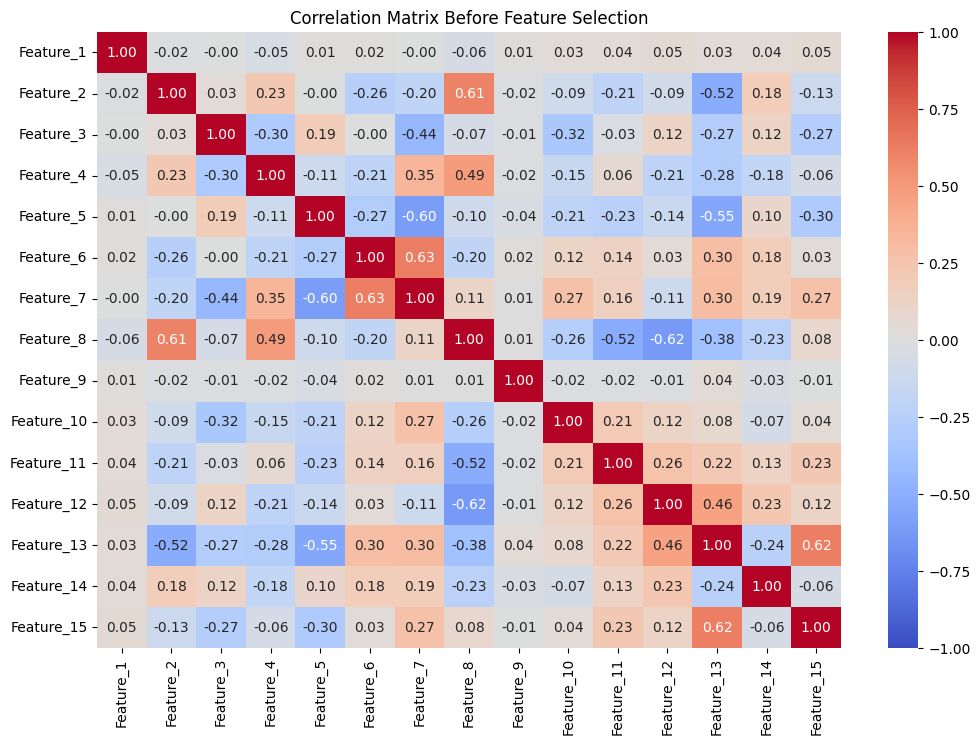

In [38]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the correlation matrix with a heatmap before feature selection
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix Before Feature Selection')
plt.show()

In [ ]:
# Initialize the DropCorrelatedFeatures method
correlation_selector = DropCorrelatedFeatures(
    threshold=0.8  # Correlation threshold above which one of the features will be dropped
)

# Fit the selector to the training data
correlation_selector.fit(X_train)

# Transform the dataset to remove highly correlated features
X_train_selected = correlation_selector.transform(X_train)
X_test_selected = correlation_selector.transform(X_test)

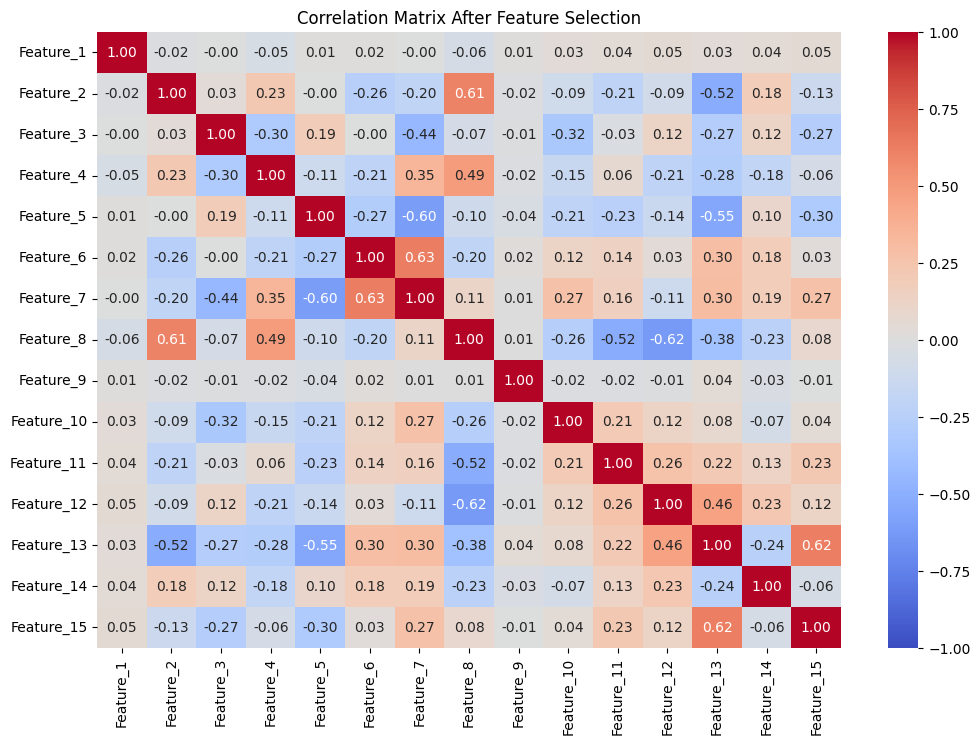

Selected Features:
Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15'],
      dtype='object')


In [39]:
# Plot the correlation matrix with a heatmap after feature selection
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix After Feature Selection')
plt.show()

# Print the selected features
print("Selected Features:")
print(X_train_selected.columns)


# Feature selection with Feature-engine --- Feature Importance